In [1]:
import pandas as pd
import numpy as np
from osgeo import gdal
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
data = pd.read_excel(r"L:\l3\dynamic landslide prediction\feature_matrix\training_data_rf_processed.xlsx")

In [4]:
X = data.iloc[:, 1:-1]

In [5]:
X

,dis2fault,GEM_RT475y,elevation,slope,TRI,TWI,TPI,curvature,plan_curva,prof_curva,dis2river,NDVI,pr,lithology,landform,soil_textu,landcover
0,1109.1,0.184778,4668.0,0.982547,13.37250,16.45910,-2.625,-0.002714,-0.000594,0.002119,327.968,660.203677,44.3,12,13,9,10
1,40273.3,0.197713,3947.0,13.036600,187.61600,8.85578,-0.750,-0.018204,0.004767,0.022971,537.158,2009.113320,18.4,12,63,7,10
2,23448.7,0.323523,4546.0,0.416816,3.79922,12.42510,-0.125,-0.000013,-0.000031,-0.000018,19643.100,-244.553223,125.2,12,13,9,10
3,38426.2,0.262972,4521.0,0.957653,9.35309,10.89640,1.250,-0.000361,-0.000021,0.000340,7910.680,4117.116837,47.5,10,23,9,10
4,14970.3,0.157768,4635.0,0.346112,4.38843,11.49810,0.000,0.000307,0.000145,-0.000163,2071.050,2127.129945,122.0,12,13,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100442,2159330.0,0.024538,477.0,3.862290,22.95180,10.02280,-2.875,-0.003781,-0.002156,0.001625,3699.320,7453.822032,167.3,11,31,7,8
100443,2222070.0,0.015961,323.0,0.753666,5.70833,17.45980,-1.125,-0.000549,-0.000266,0.000283,1135.290,637.044678,6.8,12,11,7,8
100444,2244780.0,0.016251,317.0,2.198440,20.06300,9.64616,1.375,0.000014,0.000185,0.000171,2681.030,3772.741383,35.6,11,21,7,8
100445,2187880.0,0.017039,447.0,2.806420,15.75370,9.24103,1.125,-0.000796,0.000601,0.001397,5661.960,3506.529764,6.2,13,41,7,8


In [6]:
X_continuous = X.iloc[:, :-4]

In [7]:
X_continuous

,dis2fault,GEM_RT475y,elevation,slope,TRI,TWI,TPI,curvature,plan_curva,prof_curva,dis2river,NDVI,pr
0,1109.1,0.184778,4668.0,0.982547,13.37250,16.45910,-2.625,-0.002714,-0.000594,0.002119,327.968,660.203677,44.3
1,40273.3,0.197713,3947.0,13.036600,187.61600,8.85578,-0.750,-0.018204,0.004767,0.022971,537.158,2009.113320,18.4
2,23448.7,0.323523,4546.0,0.416816,3.79922,12.42510,-0.125,-0.000013,-0.000031,-0.000018,19643.100,-244.553223,125.2
3,38426.2,0.262972,4521.0,0.957653,9.35309,10.89640,1.250,-0.000361,-0.000021,0.000340,7910.680,4117.116837,47.5
4,14970.3,0.157768,4635.0,0.346112,4.38843,11.49810,0.000,0.000307,0.000145,-0.000163,2071.050,2127.129945,122.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100442,2159330.0,0.024538,477.0,3.862290,22.95180,10.02280,-2.875,-0.003781,-0.002156,0.001625,3699.320,7453.822032,167.3
100443,2222070.0,0.015961,323.0,0.753666,5.70833,17.45980,-1.125,-0.000549,-0.000266,0.000283,1135.290,637.044678,6.8
100444,2244780.0,0.016251,317.0,2.198440,20.06300,9.64616,1.375,0.000014,0.000185,0.000171,2681.030,3772.741383,35.6
100445,2187880.0,0.017039,447.0,2.806420,15.75370,9.24103,1.125,-0.000796,0.000601,0.001397,5661.960,3506.529764,6.2


In [8]:
X_continuous.columns = ["Distance to Fault", "475-year RP PGA", "Elevation", "Slope", "TRI", "TWI", "TPI", "Curvature", "Plan Curvature", "Profile Curvature", "Distance to River", "NDVI", "Precipitation"]

In [9]:
import pandas as pd
from scipy.stats import spearmanr

# 获取列名
columns = X_continuous.columns

# 创建空的DataFrame来存储结果
spearman_corr_matrix = pd.DataFrame(index=columns, columns=columns)
spearman_p_value_matrix = pd.DataFrame(index=columns, columns=columns)

# 计算Spearman相关系数及其显著性
for col1 in columns:
    for col2 in columns:
        if col1 == col2:
            spearman_corr_matrix.loc[col1, col2] = 1.0
            spearman_p_value_matrix.loc[col1, col2] = 0.0
        else:
            corr, p_value = spearmanr(X_continuous[col1], X_continuous[col2])
            spearman_corr_matrix.loc[col1, col2] = corr
            spearman_p_value_matrix.loc[col1, col2] = p_value

# 转换为浮点数类型
spearman_corr_matrix = spearman_corr_matrix.astype(float)
spearman_p_value_matrix = spearman_p_value_matrix.astype(float)


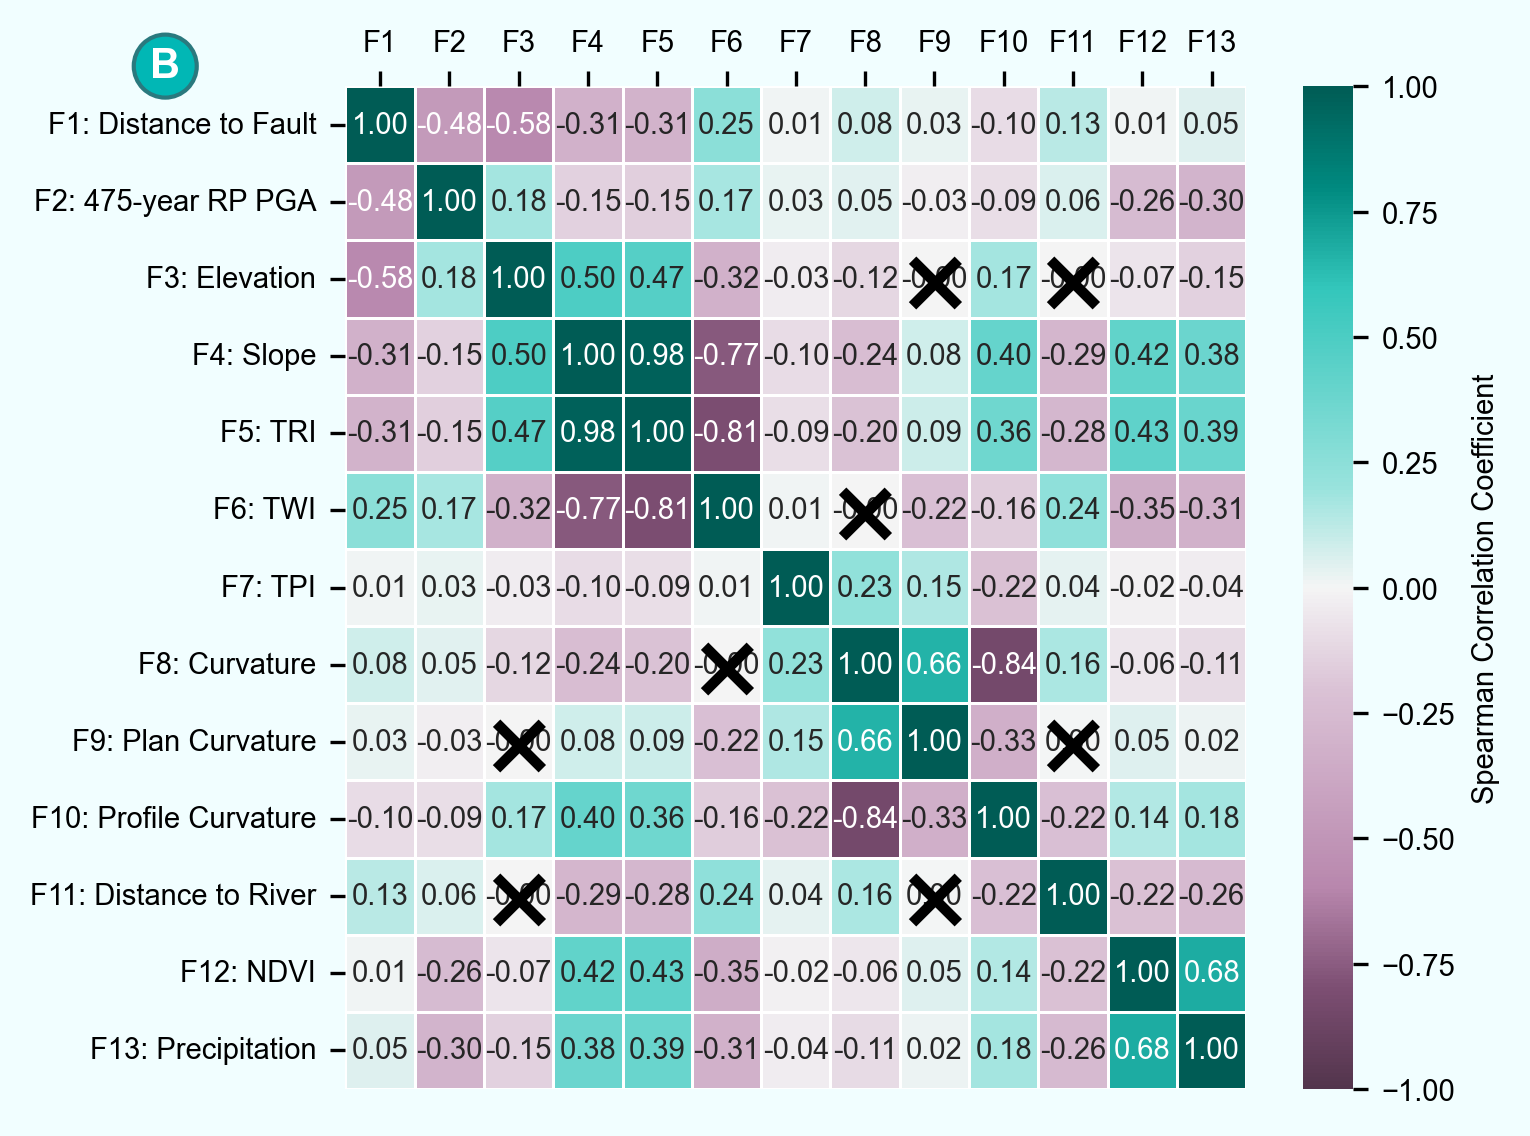

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 使用和 Pearson 相同的 colormap（如未定义则默认）
# create colormap
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
colors = [
    "#53354DFF", "#7D4F73FF", "#B887ADFF", "#CAA5C2FF",
    "#DBC3D6FF", "#F5F5F5FF", "#99E3DDFF", "#66D4CCFF",
    "#33C6BBFF", "#008A80FF", "#005C55FF"
]

cmap = LinearSegmentedColormap.from_list('chaos',colors)

fig = plt.figure(figsize=(7, 3.8), dpi=300)
gs = fig.add_gridspec(3, 3)

# 设置字体和图形参数
mpl.rcParams['hatch.linewidth'] = 0.2
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams.update({"font.size": 7})

# 添加 Spearman 热力图子图
ax = fig.add_subplot(gs[:3, :2])
sns.heatmap(
    spearman_corr_matrix,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    cmap=cmap,
    vmin=-1, vmax=1,
    cbar_kws={'label': 'Spearman Correlation Coefficient'},
    ax=ax,
    zorder=-1
)

# 在p值大于0.05的位置标记“×”
for i in range(len(columns)):
    for j in range(len(columns)):
        if spearman_p_value_matrix.iloc[i, j] > 0.05:
            ax.text(j + 0.5, i + 0.7, '×', color="k", ha='center', va='center', fontsize=30, fontweight=1)

# 设置坐标轴标签
ax.set_xticklabels([f'F{i+1}' for i in range(len(columns))], rotation=0)
ax.set_yticklabels([f'F{i+1}: {columns[i]}' for i in range(len(columns))], rotation=0)
ax.xaxis.set_ticks_position('top')

# 设置图背景颜色
ax.set_facecolor('#F1FEFF')
fig.patch.set_facecolor('#F1FEFF')

# 添加左上角小圈“B”
props = dict(boxstyle='circle', facecolor='#01B7B5', alpha=1, edgecolor="#2A797E")
ax.text(-0.2, 1.02, 'B', color='white', ha='center', va='center', fontsize=10, weight='bold',
        transform=ax.transAxes, bbox=props)

plt.tight_layout()
plt.show()


In [11]:
# create colormap
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
colors = [
    "#53354DFF", "#7D4F73FF", "#B887ADFF", "#CAA5C2FF",
    "#DBC3D6FF", "#F5F5F5FF", "#99E3DDFF", "#66D4CCFF",
    "#33C6BBFF", "#008A80FF", "#005C55FF"
]

cmap = LinearSegmentedColormap.from_list('chaos',colors)

In [12]:
X_categorical = X[["lithology", "landform", "soil_textu", "landcover"]]
X_categorical.columns = ["Lithology", "Landform", "Soil Texture", "Land cover"]
X_selected = X_continuous[["Distance to Fault", "475-year RP PGA", "Elevation", "Slope", "TPI", "Plan Curvature", "Profile Curvature", "Distance to River", "NDVI", "Precipitation"]]
X_selected = pd.concat([X_selected, X_categorical], axis=1)

In [13]:
X_selected

,Distance to Fault,475-year RP PGA,Elevation,Slope,TPI,Plan Curvature,Profile Curvature,Distance to River,NDVI,Precipitation,Lithology,Landform,Soil Texture,Land cover
0,1109.1,0.184778,4668.0,0.982547,-2.625,-0.000594,0.002119,327.968,660.203677,44.3,12,13,9,10
1,40273.3,0.197713,3947.0,13.036600,-0.750,0.004767,0.022971,537.158,2009.113320,18.4,12,63,7,10
2,23448.7,0.323523,4546.0,0.416816,-0.125,-0.000031,-0.000018,19643.100,-244.553223,125.2,12,13,9,10
3,38426.2,0.262972,4521.0,0.957653,1.250,-0.000021,0.000340,7910.680,4117.116837,47.5,10,23,9,10
4,14970.3,0.157768,4635.0,0.346112,0.000,0.000145,-0.000163,2071.050,2127.129945,122.0,12,13,9,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100442,2159330.0,0.024538,477.0,3.862290,-2.875,-0.002156,0.001625,3699.320,7453.822032,167.3,11,31,7,8
100443,2222070.0,0.015961,323.0,0.753666,-1.125,-0.000266,0.000283,1135.290,637.044678,6.8,12,11,7,8
100444,2244780.0,0.016251,317.0,2.198440,1.375,0.000185,0.000171,2681.030,3772.741383,35.6,11,21,7,8
100445,2187880.0,0.017039,447.0,2.806420,1.125,0.000601,0.001397,5661.960,3506.529764,6.2,13,41,7,8


In [14]:
y = data.iloc[:, -1]

In [15]:
#calculate mean/95ci
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [16]:
#RFE 递归特征消除
from sklearn.feature_selection import RFE
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
LGBMC = LGBMClassifier(n_estimators=100, data_sample_strategy='goss')

score_mean = []
score_bot = []
score_top = []
for i in range(1,15,1):
    X_wrapper = RFE(LGBMC,n_features_to_select=i, step=1).fit_transform(X_selected,y)
    once = cross_val_score(LGBMC,X_wrapper,y,cv=10)
    mean, bot, top = mean_confidence_interval(once)
    score_mean.append(mean)
    score_bot.append(bot)
    score_top.append(top)

[LightGBM] [Info] Number of positive: 33633, number of negative: 66814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2615
[LightGBM] [Info] Number of data points in the train set: 100447, number of used features: 14
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334833 -> initscore=-0.686405
[LightGBM] [Info] Start training from score -0.686405
[LightGBM] [Info] Number of positive: 33633, number of negative: 66814
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2360
[LightGBM] [Info] Number of data points in the train set: 100447, number of used features: 13
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [bin

In [17]:
score_mean

[0.6036126429474374,
 0.8154151945476737,
 0.8333546650586102,
 0.8166683952480664,
 0.8373567165596313,
 0.8317912573427542,
 0.8321292802460611,
 0.8378937354584576,
 0.8389192421439245,
 0.8347276413843796,
 0.8296703781608805,
 0.834936866141392,
 0.8337121196352772,
 0.8383420416568294]

In [18]:
# 最优特征数为9
from sklearn.feature_selection import RFE
LGBMC = LGBMClassifier(n_estimators=100, data_sample_strategy='goss')
selector = RFE(LGBMC, n_features_to_select=9, step=1).fit(X_selected, y)
selector.support_.sum()
selector.ranking_
X_wrapper = selector.transform(X_selected)
#保留特征名称
all_name = X_selected.columns.values.tolist()
select_name_index = selector.get_support(indices=True)
selected_name = []
for i in select_name_index:
    selected_name.append(all_name[i])
X_result = pd.DataFrame(X_wrapper, columns=selected_name)

cross_val_score(LGBMC,X_wrapper,y,cv=10).mean()

[LightGBM] [Info] Number of positive: 33633, number of negative: 66814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2615
[LightGBM] [Info] Number of data points in the train set: 100447, number of used features: 14
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.334833 -> initscore=-0.686405
[LightGBM] [Info] Start training from score -0.686405
[LightGBM] [Info] Number of positive: 33633, number of negative: 66814
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2360
[LightGBM] [Info] Number of data points in the train set: 100447, number of used 

0.8389192421439245

In [19]:
X_result

,Distance to Fault,475-year RP PGA,Elevation,Slope,Distance to River,NDVI,Precipitation,Lithology,Land cover
0,1109.1,0.184778,4668.0,0.982547,327.968,660.203677,44.3,12.0,10.0
1,40273.3,0.197713,3947.0,13.036600,537.158,2009.113320,18.4,12.0,10.0
2,23448.7,0.323523,4546.0,0.416816,19643.100,-244.553223,125.2,12.0,10.0
3,38426.2,0.262972,4521.0,0.957653,7910.680,4117.116837,47.5,10.0,10.0
4,14970.3,0.157768,4635.0,0.346112,2071.050,2127.129945,122.0,12.0,10.0
...,...,...,...,...,...,...,...,...,...
100442,2159330.0,0.024538,477.0,3.862290,3699.320,7453.822032,167.3,11.0,8.0
100443,2222070.0,0.015961,323.0,0.753666,1135.290,637.044678,6.8,12.0,8.0
100444,2244780.0,0.016251,317.0,2.198440,2681.030,3772.741383,35.6,11.0,8.0
100445,2187880.0,0.017039,447.0,2.806420,5661.960,3506.529764,6.2,13.0,8.0


             Feature  Tolerance       VIF
0  Distance to Fault   0.724463  1.380332
1    475-year RP PGA   0.641433  1.559010
2          Elevation   0.623999  1.602567
3              Slope   0.542534  1.843203
4  Distance to River   0.862465  1.159468
5               NDVI   0.588363  1.699632
6      Precipitation   0.707714  1.413000
7          Lithology   0.925488  1.080511
8         Land cover   0.625789  1.597983


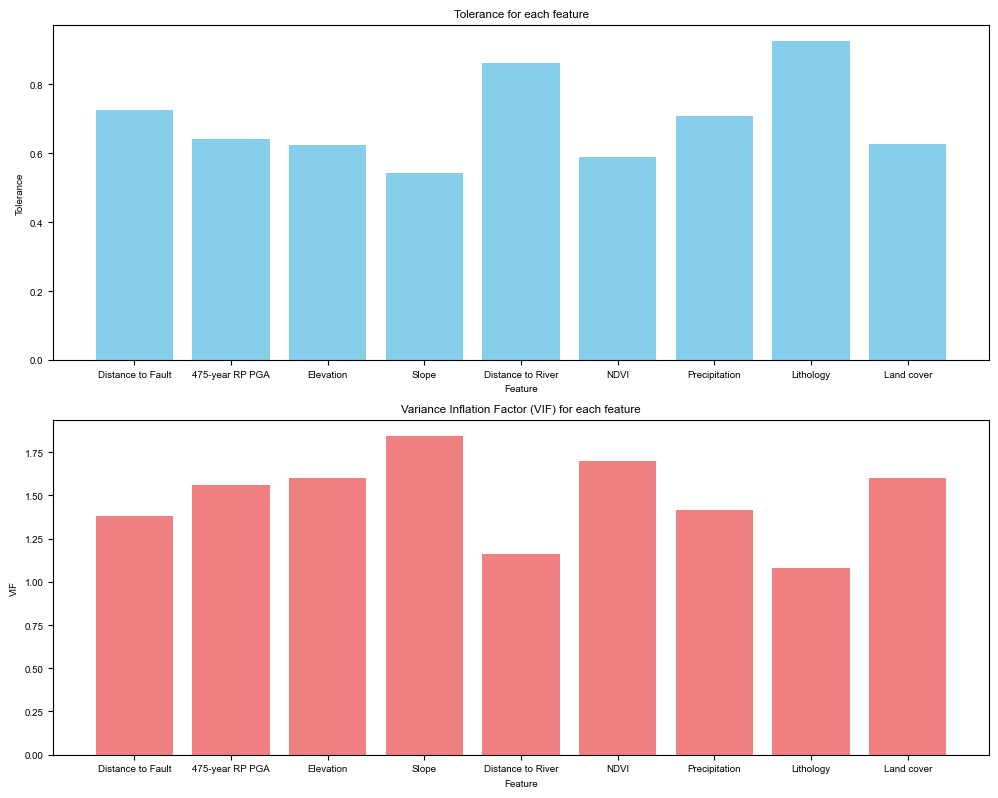

In [69]:
# 计算TOL和VIF
# 计算Tolerance和VIF
import statsmodels.api as sm
tolerance_list = []
vif_list = []
features = X_result.columns

for column in features:
    X = X_result.drop(columns=[column])
    y = X_result[column]
    X = sm.add_constant(X)  # 添加常数项
    model = sm.OLS(y, X).fit()
    R2 = model.rsquared
    tolerance = 1 - R2
    vif = 1 / tolerance
    tolerance_list.append(tolerance)
    vif_list.append(vif)

# 将结果存储在DataFrame中
results_df = pd.DataFrame({
    'Feature': features,
    'Tolerance': tolerance_list,
    'VIF': vif_list
})

print(results_df)

# 可视化
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Tolerance条形图
ax[0].bar(results_df['Feature'], results_df['Tolerance'], color='skyblue')
ax[0].set_title('Tolerance for each feature')
ax[0].set_xlabel('Feature')
ax[0].set_ylabel('Tolerance')

# VIF条形图
ax[1].bar(results_df['Feature'], results_df['VIF'], color='lightcoral')
ax[1].set_title('Variance Inflation Factor (VIF) for each feature')
ax[1].set_xlabel('Feature')
ax[1].set_ylabel('VIF')

plt.tight_layout()
plt.show()


In [70]:
#画图

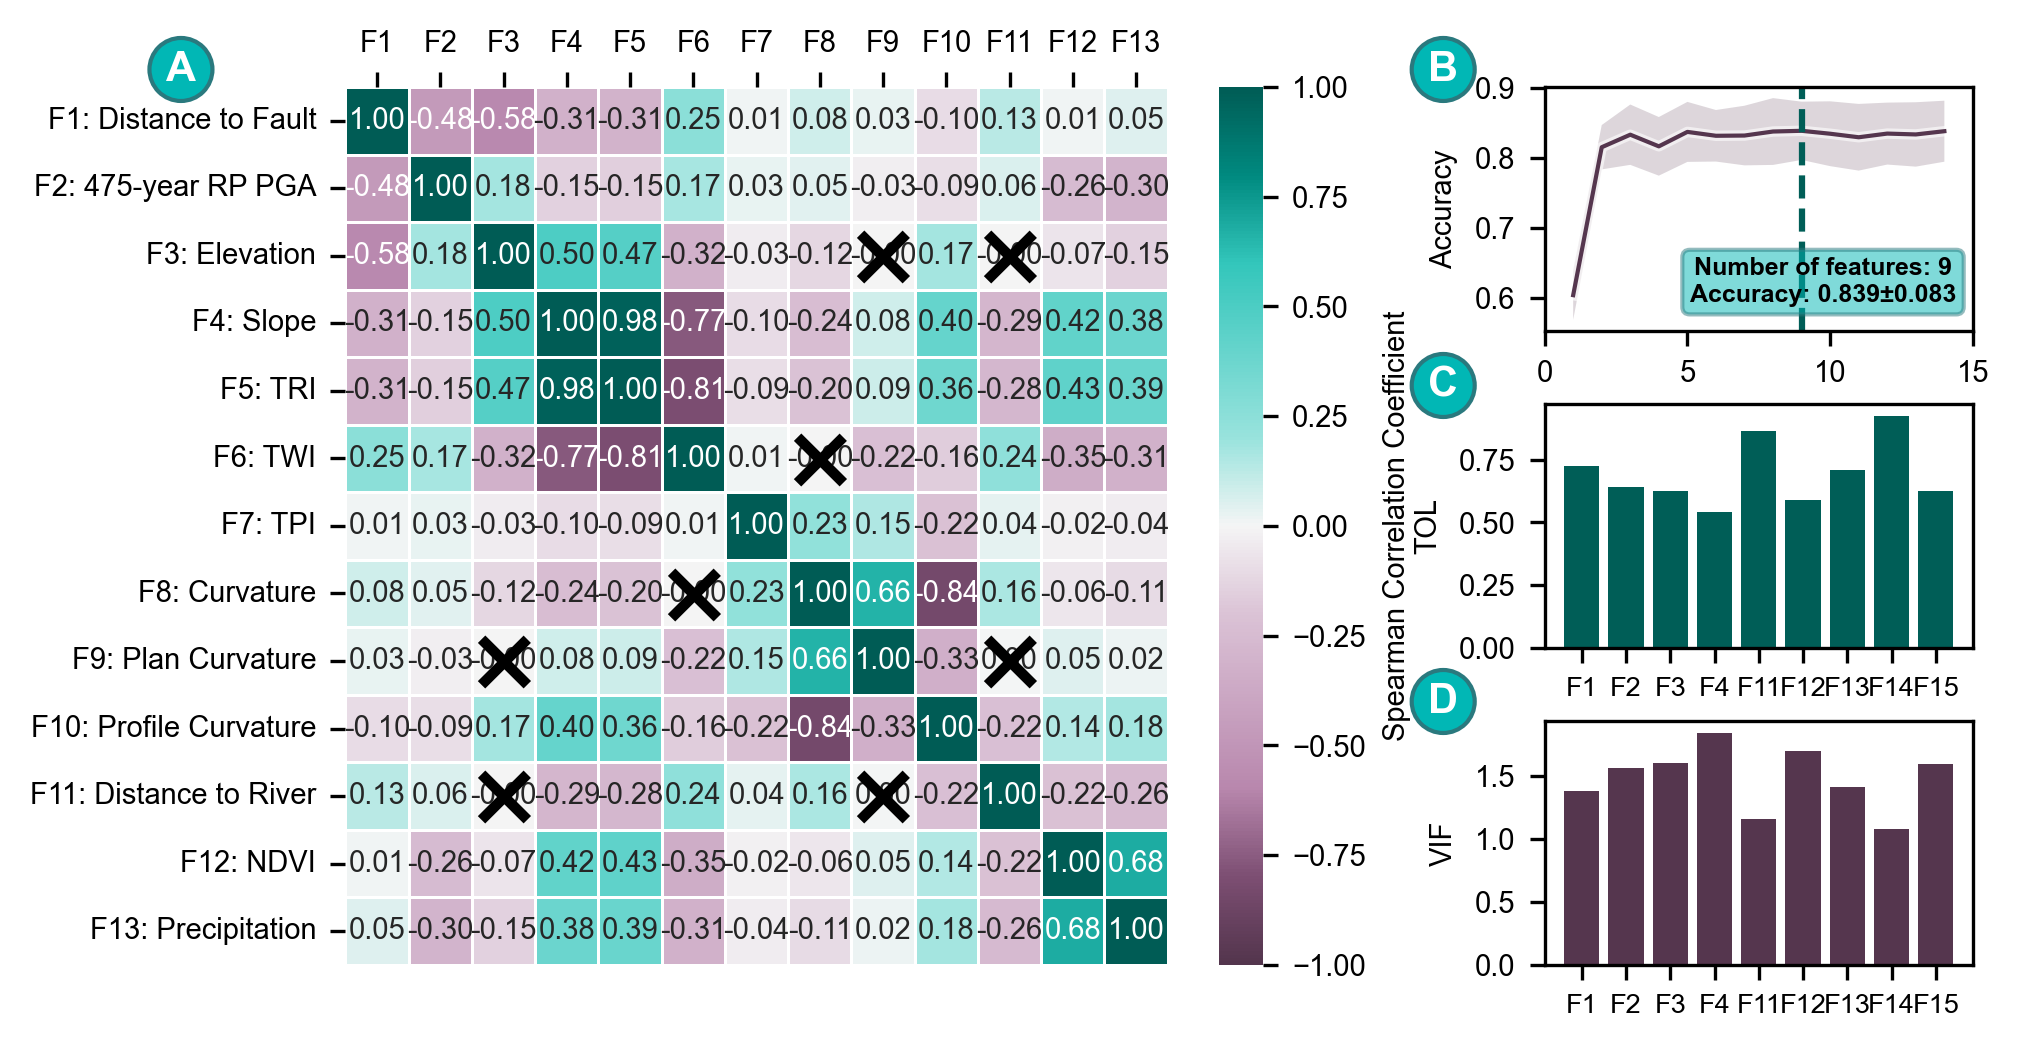

In [72]:
fig = plt.figure(figsize=(7, 3.8), dpi=300)
gs = fig.add_gridspec(3, 3)

# 设置字体和图形参数
mpl.rcParams['hatch.linewidth'] = 0.2
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams.update({"font.size": 7})

# 添加 Spearman 热力图子图
ax = fig.add_subplot(gs[:3, :2])
sns.heatmap(
    spearman_corr_matrix,
    annot=True,
    fmt=".2f",
    linewidth=0.3,
    cmap=cmap,
    vmin=-1, vmax=1,
    cbar_kws={'label': 'Spearman Correlation Coefficient'},
    ax=ax,
    zorder=-1
)

# 在p值大于0.05的位置标记“×”
for i in range(len(columns)):
    for j in range(len(columns)):
        if spearman_p_value_matrix.iloc[i, j] > 0.05:
            ax.text(j + 0.5, i + 0.7, '×', color="k", ha='center', va='center', fontsize=30, fontweight=1)

# 设置坐标轴标签
ax.set_xticklabels([f'F{i+1}' for i in range(len(columns))], rotation=0)
ax.set_yticklabels([f'F{i+1}: {columns[i]}' for i in range(len(columns))], rotation=0)
ax.xaxis.set_ticks_position('top')

# 设置图背景颜色


# 添加左上角小圈“B”
props = dict(boxstyle='circle', facecolor='#01B7B5', alpha=1, edgecolor="#2A797E")
ax.text(-0.2, 1.02, 'A', color='white', ha='center', va='center', fontsize=10, weight='bold',
        transform=ax.transAxes, bbox=props)
#RFE visualisation
ax1 = fig.add_subplot(gs[0, 2])

ax1.fill_between(range(1, 15), score_bot, score_top, alpha=0.2, color='#55364E', edgecolor=None)
ax1.plot(range(1, 15), score_mean, color='white', linewidth=2.5, alpha=0.6)
ax1.plot(range(1, 15), score_mean, color='#55364E',linewidth=1,label='SSP1-2.6')

ax1.set_xlim(0, 15)
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Number of Features")
#标记最大值
max_index = np.argmax(score_mean)
max_value = round(score_mean[max_index], 3)
uncertainty = round((score_mean[max_index] - score_bot[max_index])*2, 3)

ax1.axvline(x=max_index+1, color='#005E57', linestyle='--', label='Max Value')
props1 = dict(boxstyle='round', facecolor='#01B7B5', alpha=0.5, edgecolor="#2A797E")

ax1.text(0.65, 0.2, f'Number of features: {max_index+1}\nAccuracy: {max_value}±{uncertainty}', color='k', ha='center', va='center', fontsize=6, weight='bold', transform=ax1.transAxes, bbox=props1)


# Tolerance条形图
ax2 = fig.add_subplot(gs[1, 2])

results_df["Feature"] = ["F1", "F2", "F3", "F4", "F11", "F12", "F13", "F14", "F15"]
ax2.bar(results_df['Feature'], results_df['Tolerance'], color='#005E57')
ax2.set_ylabel('TOL')
ax2.tick_params(axis='x', labelsize=6.5)
# VIF条形图
ax3 = fig.add_subplot(gs[2, 2])

ax3.bar(results_df['Feature'], results_df['VIF'], color='#55364E')
ax3.set_ylabel('VIF')
ax3.tick_params(axis='x', labelsize=6.5)
fig.subplots_adjust(hspace=0.3, wspace=0.4)
# plt.tight_layout()
ax1.text(1.335, 1.02, 'B', color='white', ha='center', va='center', fontsize=10, weight='bold', transform=ax.transAxes, bbox=props)
ax2.text(1.335, 0.66, 'C', color='white', ha='center', va='center', fontsize=10, weight='bold', transform=ax.transAxes, bbox=props)
ax3.text(1.335, 0.3, 'D', color='white', ha='center', va='center', fontsize=10, weight='bold', transform=ax.transAxes, bbox=props)
plt.savefig(r"E:\l3\dynamic landslide prediction\Revision Round1\Revised figs\Figure 4.jpg", dpi=300, bbox_inches="tight")

In [153]:
score_mean

[0.6036126429474374,
 0.8154151945476737,
 0.8333546650586102,
 0.8166683952480664,
 0.8373567165596313,
 0.8317912573427542,
 0.8321292802460611,
 0.8378937354584576,
 0.8389192421439245,
 0.8347276413843796,
 0.8296703781608805,
 0.834936866141392,
 0.8337121196352772,
 0.8383420416568294,
 0.8350068290859195]